In [3]:
"""
Athena Xia | ECE 5831 | Summer 2024
Final Project - Part 2: K-Means Clustering
Program to perform k-means clustering on iris dataset
Portions of code borrowed from Alireza Mohammadi ECE 5831 Lecture10 material
3D plot code borrowed from https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#plot-a-pca-representation
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

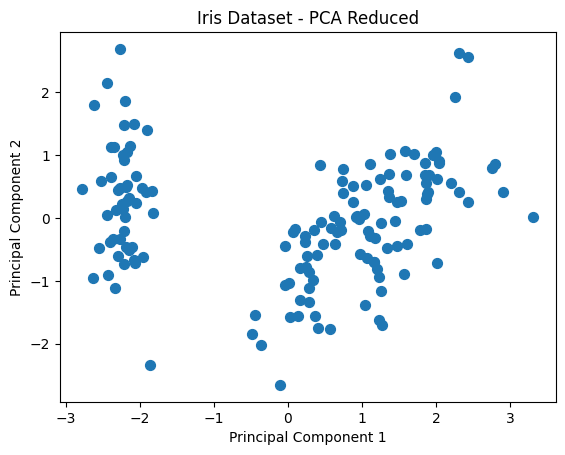

In [4]:
# Step 1: Load the Iris dataset
# The Iris dataset is available in sklearn.datasets
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Standardize the features
# Standardization is important for k-means clustering to ensure all features contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions for visualization using PCA
# Since the Iris dataset has 4 features, we use PCA to reduce it to 2 dimensions for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the dataset in 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50)
plt.title("Iris Dataset - PCA Reduced")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [6]:
# k-means clustering algorithm coded from scratch
def kmeans_alg(X_values, n_clusters, n_init, max_iter, tol):
    size = len(X_values)
    dimension = len(X_values[0])

    # lists to hold centers and inertia
    centers_list = []
    inertia_list = []

    # run n_init number of times
    for runs in range(n_init):
        # randomly pick pts to be initial cluster centers
        centers = []
        for i in range(n_clusters):
            idx = np.random.randint(0, size)
            # print(idx)
            centers.append(X_values[idx])
        centers = np.array(centers)
        # print(centers)

        # set previous cost to high number
        prev_cost = 1e6

        counter = 0
        while(True):
            # increment counter
            counter += 1

            # initialize matrices
            distances = np.zeros((size, n_clusters))
            bookkeeper = np.zeros((size, n_clusters))

            # calculate euclidean distance from each center for each point
            for i in range(size):
                for j in range(n_clusters):
                    distances[i][j] = np.linalg.norm(X_values[i] - centers[j])
                # assign closest cluster center
                bookkeeper[i][np.argmin(distances[i])] = 1

            # initialize array to hold sums
            sums = np.array([np.zeros(dimension) for i in range(n_clusters)])
            # calculate sum of points in each cluster
            for i in range(size):
                sums[np.argmax(bookkeeper[i])] += X_values[i]

            # add up number of pts in each cluster, reshape for kx1 matrix
            pt_totals = np.reshape(np.sum(bookkeeper, axis=0), (n_clusters, 1))

            # divide sums by no of pts to get new centers
            for i in range(n_clusters):
                if pt_totals[i][0] != 0:
                    centers[i] = sums[i] / pt_totals[i]

            # multiply matrices
            J = distances * bookkeeper

            # frobenius norm as cost function
            cost = np.linalg.norm(J)
            # inertia to compare with other runs
            inertia = np.sum(J**2)

            # print(prev_cost, cost)

            # check if convergence tolerance is met or max iterations reached
            if prev_cost - cost <= tol or counter == max_iter:
                centers_list.append(centers)
                inertia_list.append(inertia)
                break

            # set previous cost to current cost
            prev_cost = cost

    # find run with best inertia
    best = np.argmin(inertia_list)

    return centers_list[best], inertia_list[best]

In [7]:
# hyperparameters
K = 3
n_init = 10
max_iter = 300
tol = 1e-4

# run kmeans 10 times to get best centers and inertia and y prediction
centers, inertia = kmeans_alg(X_scaled, K, n_init, max_iter, tol)

# y prediction
y_kmeans = []
distances = np.zeros((len(X_scaled), K))
for i in range(len(X_scaled)):
    for j in range(K):
        distances[i][j] = np.linalg.norm(X_scaled[i] - centers[j])
    # assign closest cluster center
    y_kmeans.append(np.argmin(distances[i]))

print("Algorithm Coded from Scratch")
print("Cluster Centers:\n", centers)
print("Inertia:", inertia)

# compare prediction with actual classification
print("\nFrom Scratch - Confusion Matrix:\n", confusion_matrix(y, y_kmeans))

Algorithm Coded from Scratch
Cluster Centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
Inertia: 139.82049635974982

From Scratch - Confusion Matrix:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


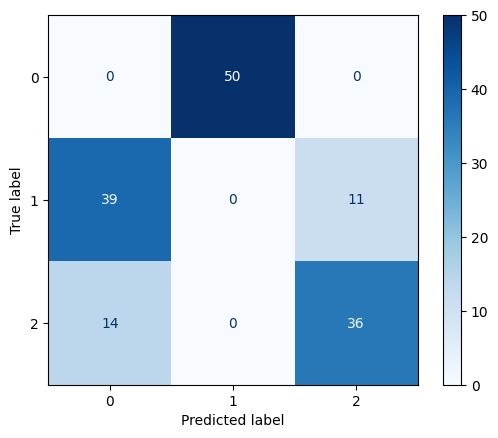

In [8]:
# confusion matrix visualization
cm = ConfusionMatrixDisplay(confusion_matrix(y, y_kmeans))
cm.plot(cmap="Blues")
plt.show()

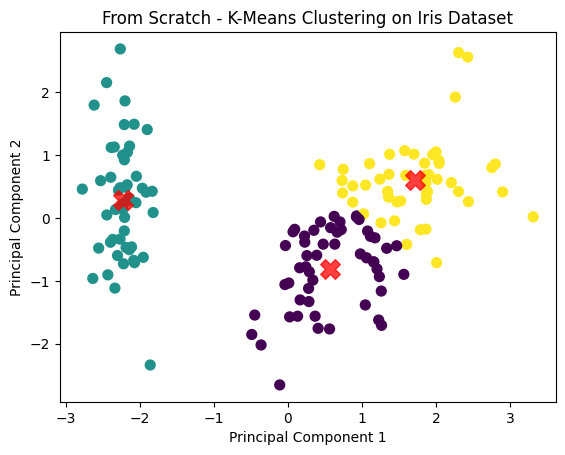

In [9]:
# Plot the data points in the PCA reduced space and color them based on the predicted clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids of the clusters in the PCA reduced space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("From Scratch - K-Means Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [11]:
# k-means using Scikit-Learn

# initialize
kmeans = KMeans(n_clusters=K, n_init=n_init, tol=tol)

# fit using normalized X
kmeans.fit(X_scaled)

# predict clusters
y_kmeans = kmeans.predict(X_scaled)

# get centers
centers = kmeans.cluster_centers_

print("SKLearn")
print("Cluster Centers:\n", centers)
print("Inertia:", kmeans.inertia_)

# compare prediction with actual classification
print("\nSKLearn - Confusion Matrix:\n", confusion_matrix(y, y_kmeans))

SKLearn
Cluster Centers:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]
Inertia: 139.82049635974974

SKLearn - Confusion Matrix:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


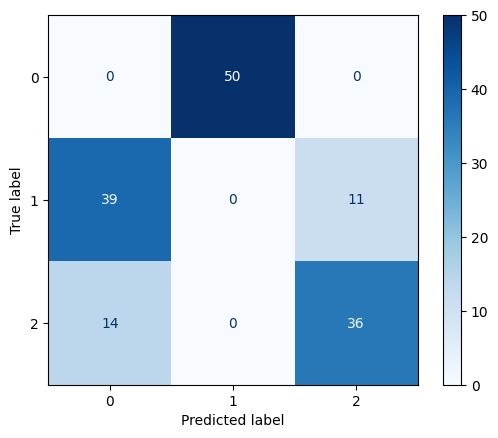

In [ ]:
# confusion matrix visualization
cm = ConfusionMatrixDisplay(confusion_matrix(y, y_kmeans))
cm.plot(cmap="Blues")
plt.show()

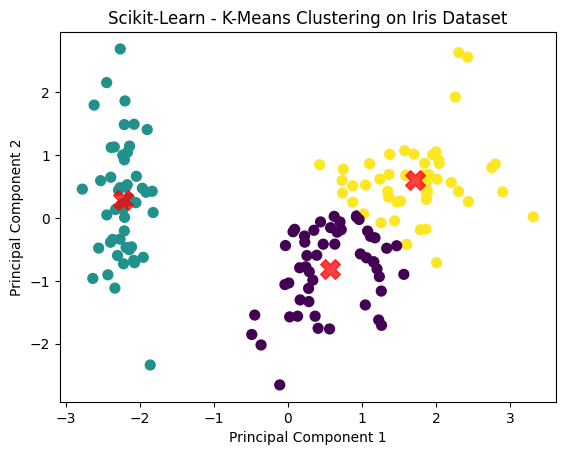

In [ ]:
# Plot the data points in the PCA reduced space and color them based on the predicted clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the centroids of the clusters in the PCA reduced space
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Scikit-Learn - K-Means Clustering on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

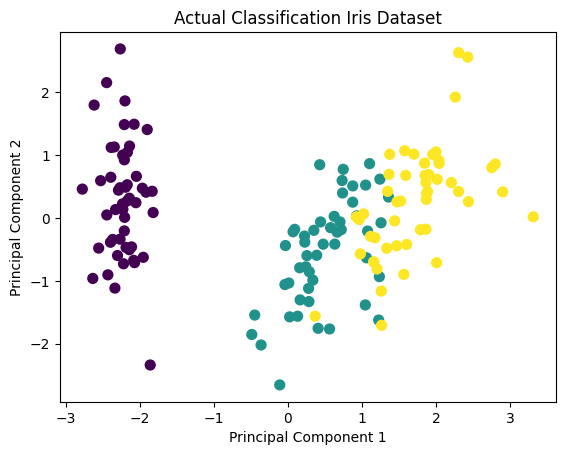

In [ ]:
# Plot the data points in the PCA reduced space and color them based on the predicted clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')

plt.title("Actual Classification Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

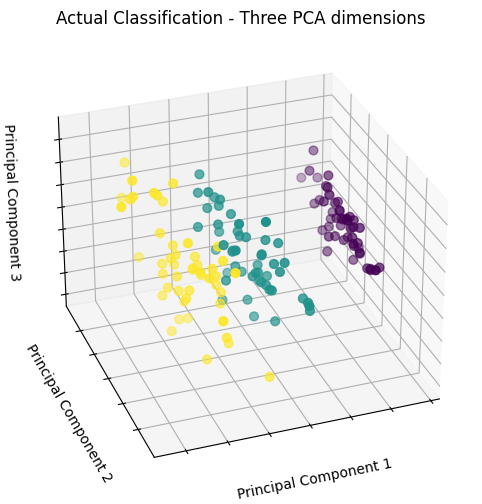

In [ ]:
# 3D plot for more insight
import mpl_toolkits.mplot3d

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_pca3[:, 0],
    X_pca3[:, 1],
    X_pca3[:, 2],
    c=y,
    s=40,
)

ax.set_title("Actual Classification - Three PCA dimensions")
ax.set_xlabel("Principal Component 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Principal Component 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Principal Component 3")
ax.zaxis.set_ticklabels([])

plt.show()

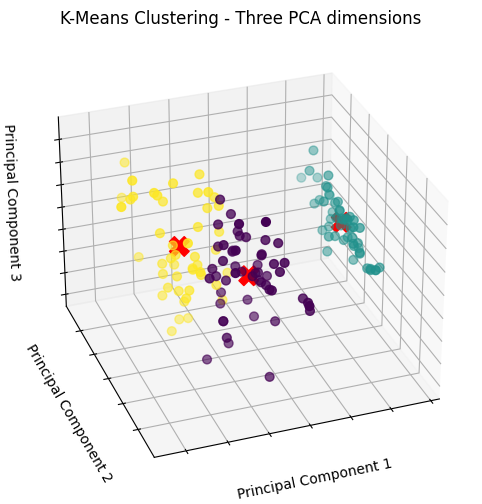

In [ ]:
centers_pca3 = pca3.transform(centers)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_pca3[:, 0],
    X_pca3[:, 1],
    X_pca3[:, 2],
    c=y_kmeans,
    s=40,
)

ax.scatter(
    centers_pca3[:, 0],
    centers_pca3[:, 1],
    centers_pca3[:, 2],
    c='red',
    s=200,
    marker='X',
    alpha=1
)

ax.set_title("K-Means Clustering - Three PCA dimensions")
ax.set_xlabel("Principal Component 1")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Principal Component 2")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("Principal Component 3")
ax.zaxis.set_ticklabels([])

plt.show()

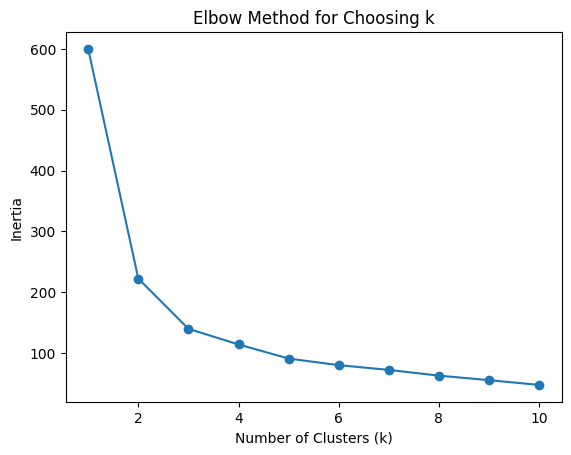

In [ ]:
# Determine optimal k using elbow curve

# Define the range of k values to try
k_values = range(1, 11)
inertia_values = []

# Loop over the range of k values and fit the k-means model for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values for each k to observe the "elbow"
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()